In [1]:
library(readr)
library(dplyr)
library(purrr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# http://serialmentor.com/blog/2016/6/13/reading-and-combining-many-tidy-data-files-in-R

In [3]:
files <- dir(path = "../output/", pattern = "*.csv", full.names = TRUE)

In [4]:
data <- files %>%
  map(read_csv, col_names = c('inds', 'counts', 'vocab_size', 'year', 'president')) %>% 
  reduce(rbind)

Parsed with column specification:
cols(
  inds = col_integer(),
  counts = col_integer(),
  vocab_size = col_integer(),
  year = col_integer(),
  president = col_character()
)
Parsed with column specification:
cols(
  inds = col_integer(),
  counts = col_integer(),
  vocab_size = col_integer(),
  year = col_integer(),
  president = col_character()
)
Parsed with column specification:
cols(
  inds = col_integer(),
  counts = col_integer(),
  vocab_size = col_integer(),
  year = col_integer(),
  president = col_character()
)
Parsed with column specification:
cols(
  inds = col_integer(),
  counts = col_integer(),
  vocab_size = col_integer(),
  year = col_integer(),
  president = col_character()
)
Parsed with column specification:
cols(
  inds = col_integer(),
  counts = col_integer(),
  vocab_size = col_integer(),
  year = col_integer(),
  president = col_character()
)
Parsed with column specification:
cols(
  inds = col_integer(),
  counts = col_integer(),
  vocab_size = col_integer(),


In [25]:
data

inds,counts,vocab_size,year,president
0,1,509,1789,Washington
1,2,509,1789,Washington
2,3,509,1789,Washington
3,4,509,1789,Washington
4,5,509,1789,Washington
5,6,509,1789,Washington
6,7,509,1789,Washington
7,8,509,1789,Washington
8,9,509,1789,Washington
9,10,509,1789,Washington


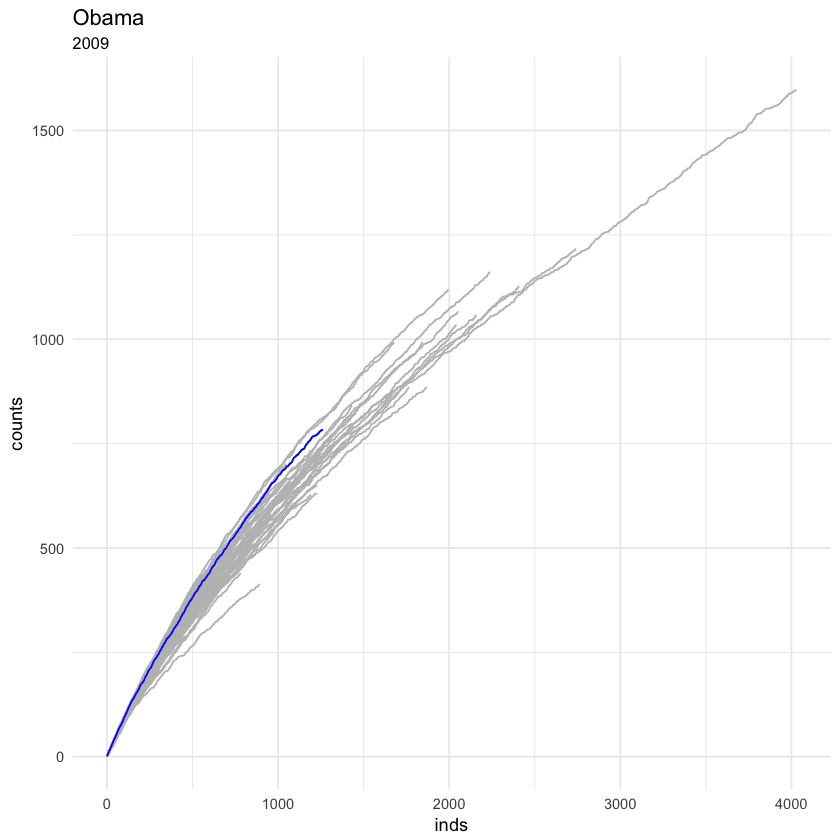

In [67]:
obama <- filter(data, president == 'Obama')

ggplot() +
   geom_line(data = data, aes(x = inds, y = counts, group = year), colour = 'grey') +
   geom_line(data = obama, aes(x = inds, y = counts), colour = 'blue') + 
   theme_minimal() +
   ggtitle("Obama", subtitle = "2009")

#ggsave('~/Desktop/collectors_obama.png', height = 10, width = 10)

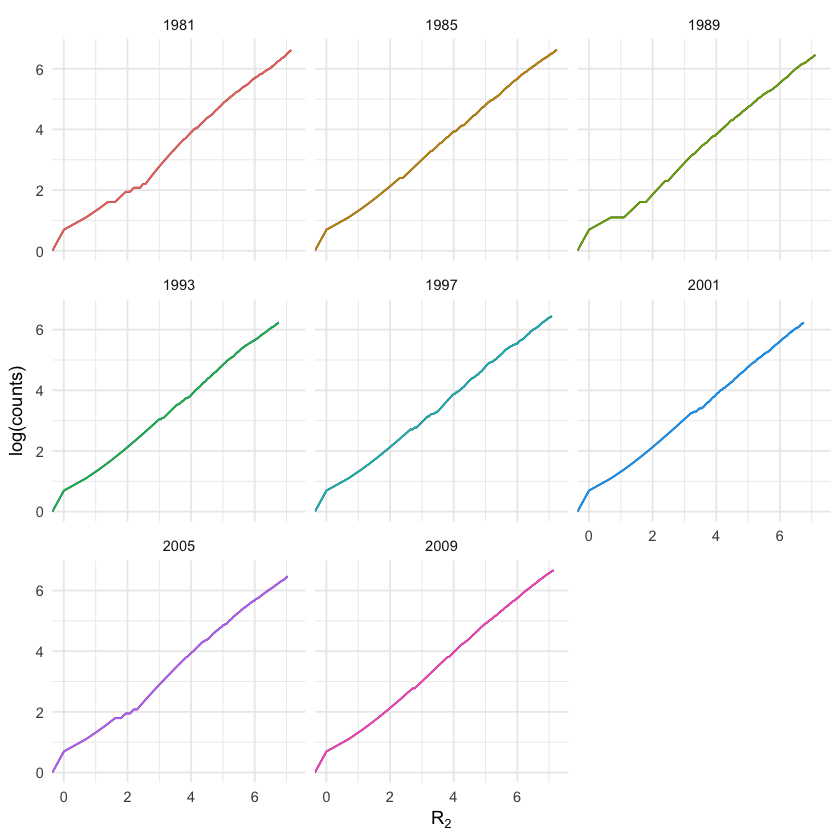

In [52]:
data %>%
 filter(year > 1977) %>%
 mutate(combined = paste(year, president), normalized = counts/vocab_size) %>% 
 ggplot() +
   geom_line(aes(log(inds), log(counts), group = combined)) +
   geom_line(aes(log(inds), log(counts), color = combined)) +
   facet_wrap(~year) +
   theme_minimal() + 
   theme(legend.position="none") 

In [37]:
full <- data %>%
 mutate(combined = paste(year, president), normalized = counts/vocab_size)

part <- data %>%
 mutate(combined = paste(year, president), normalized = counts/vocab_size) %>%
 select(-combined)

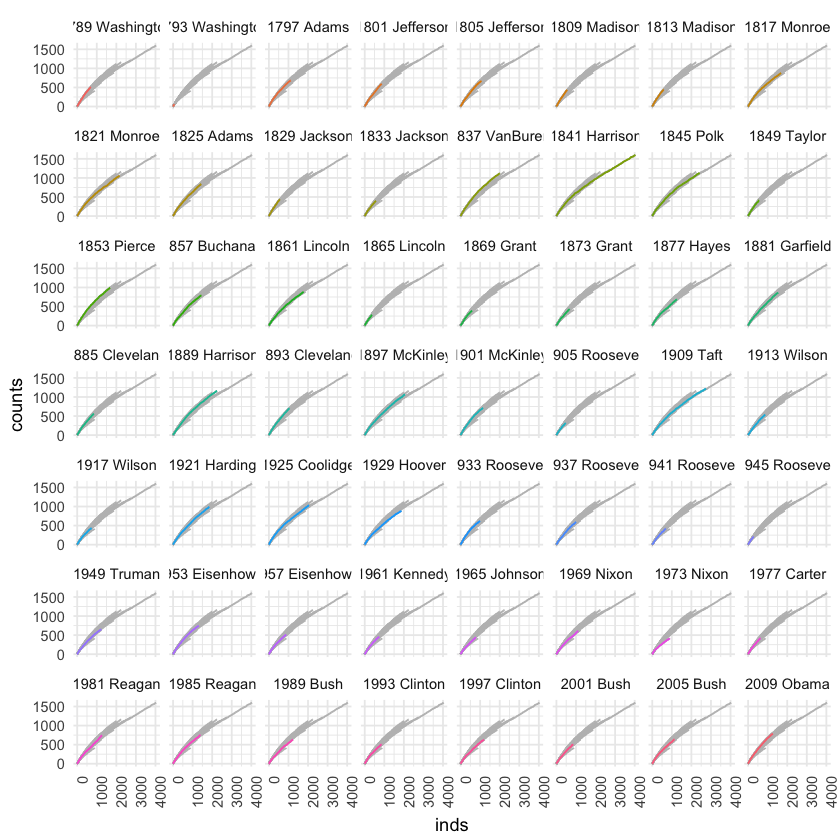

In [70]:
ggplot() +
  geom_line(data = part, aes(inds, counts, group = year), colour = 'grey', size = .5) +
  geom_line(data = full, aes(inds, counts, colour = combined)) +
  facet_wrap(~combined) + 
  theme_minimal() +
  theme(legend.position="none",
        axis.text.x = element_text(angle = 90, hjust = 1)) 


In [71]:
ggsave('~/Desktop/collectors_all-presidents.png', height = 10, width = 10)